Prueba con scaler minmax en vez del estándar

In [1]:
#from codecarbon import EmissionsTracker
#try:
    #tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
#except:
    #pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
#tracker = EmissionsTracker()
#tracker.start()

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [3]:
%pip install --upgrade kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip show kagglehub


Name: kagglehub
Version: 0.3.10
Summary: Access Kaggle resources anywhere
Home-page: 
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, or are under common
              control with that entity. For the purposes of this definition,
              "contro

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhoomikavalani/donateacrycorpusfeaturesdataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2


In [6]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [7]:
df.head()

,Cry_Audio_File,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437


PREPROCESADO

In [8]:
df.shape

(457, 27)

In [9]:
col_names = df.columns

col_names

Index(['Cry_Audio_File', 'Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean',
       'ZCR_Mean', 'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean',
       'MFCCs13Mean', 'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20',
       'MFCCs1', 'MFCCs2', 'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7',
       'MFCCs8', 'MFCCs9', 'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13'],
      dtype='object')

In [10]:
df['Cry_Reason'].value_counts()

3    382
2     27
4     24
0     16
1      8
Name: Cry_Reason, dtype: int64

0 - belly pain
1 - burping
2 - discomfort
3 - hungry
4 - tired

In [11]:
#imbalanced data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cry_Audio_File           457 non-null    object 
 1   Cry_Reason               457 non-null    int64  
 2   Amplitude_Envelope_Mean  457 non-null    float64
 3   RMS_Mean                 457 non-null    float64
 4   ZCR_Mean                 457 non-null    float64
 5   STFT_Mean                457 non-null    float64
 6   SC_Mean                  457 non-null    float64
 7   SBAN_Mean                457 non-null    float64
 8   SCON_Mean                457 non-null    float64
 9   MFCCs13Mean              457 non-null    float64
 10  delMFCCs13               457 non-null    float64
 11  del2MFCCs13              457 non-null    float64
 12  MelSpec                  457 non-null    float64
 13  MFCCs20                  457 non-null    float64
 14  MFCCs1                   4

In [12]:
df = df.drop(columns=['Cry_Audio_File'])


In [13]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [14]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 26 numerical variables

The numerical variables are : ['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean', 'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean', 'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2', 'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9', 'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13']


In [15]:
# view the numerical variables

df[numerical].head()

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437


In [16]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Cry_Reason                 0
Amplitude_Envelope_Mean    0
RMS_Mean                   0
ZCR_Mean                   0
STFT_Mean                  0
SC_Mean                    0
SBAN_Mean                  0
SCON_Mean                  0
MFCCs13Mean                0
delMFCCs13                 0
del2MFCCs13                0
MelSpec                    0
MFCCs20                    0
MFCCs1                     0
MFCCs2                     0
MFCCs3                     0
MFCCs4                     0
MFCCs5                     0
MFCCs6                     0
MFCCs7                     0
MFCCs8                     0
MFCCs9                     0
MFCCs10                    0
MFCCs11                    0
MFCCs12                    0
MFCCs13                    0
dtype: int64

In [17]:
# view summary statistics in numerical variables

print((df[numerical].describe()),2)

       Cry_Reason  Amplitude_Envelope_Mean    RMS_Mean    ZCR_Mean  \
count  457.000000               457.000000  457.000000  457.000000   
mean     2.853392                 0.051791    0.020425    0.094088   
std      0.690120                 0.041558    0.017054    0.027277   
min      0.000000                 0.000504    0.000187    0.032646   
25%      3.000000                 0.018715    0.006875    0.073336   
50%      3.000000                 0.040515    0.016071    0.092543   
75%      3.000000                 0.073548    0.029639    0.111112   
max      4.000000                 0.212100    0.096381    0.183001   

        STFT_Mean      SC_Mean   SBAN_Mean   SCON_Mean  MFCCs13Mean  \
count  457.000000   457.000000  457.000000  457.000000   457.000000   
mean     0.723645  1208.523108  559.457103   26.671653   -43.967221   
std      1.006595   271.103944  102.135948    2.575177     6.841562   
min      0.000098   548.434286  272.392864   15.047119   -72.727020   
25%      0.082

Normalización usando el Scaler estándar

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.drop(columns=['Cry_Reason'])  # Características
y = df['Cry_Reason']  # Etiqueta de clase

X_scaled = scaler.fit_transform(X)  # Normalizamos solo las características


In [19]:
X = X_scaled

Dividimos en train y test

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
#20% test, 80% training
X_train.shape, X_test.shape

((365, 25), (92, 25))

Como los datos están extremadamente imbalanceados, utilizamos SMOTE para corregirlo

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
import pandas as pd

print("Distribución de clases después de SMOTE:\n", pd.Series(y_train).value_counts())

Distribución de clases después de SMOTE:
 3    303
2    303
0    303
4    303
1    303
Name: Cry_Reason, dtype: int64


In [24]:
import pandas as pd

# Convertir X_train y X_test en DataFrames con sus nombres de columnas originales
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=['Cry_Reason']).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=['Cry_Reason']).columns)

In [25]:
# Convertir y_train y y_test en DataFrames
y_train_df = pd.DataFrame(y_train, columns=['Cry_Reason'])
y_test_df = pd.DataFrame(y_test, columns=['Cry_Reason'])


In [26]:
X_train = X_train_df
X_test = X_test_df

In [27]:
X_train.head()

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0.374213,0.372827,0.392454,0.179229,0.666934,0.452345,0.763533,0.691470,0.507282,0.445185,...,0.489690,0.454050,0.740402,0.576660,0.445180,0.727566,0.589308,0.501645,0.639484,0.593722
1,0.061711,0.060904,0.172902,0.005108,0.214140,0.584573,0.867004,0.638340,0.719800,0.452650,...,0.654943,0.498362,0.798483,0.691969,0.553820,0.722595,0.361451,0.293668,0.440511,0.367793
2,0.057949,0.048620,0.503669,0.003753,0.483213,0.416920,0.614954,0.445053,0.763259,0.363462,...,0.537015,0.424253,0.612432,0.523449,0.606219,0.764963,0.372954,0.395968,0.481422,0.275361
3,0.061137,0.058801,0.443701,0.004324,0.676313,0.612495,0.464850,0.449919,0.652641,0.784949,...,0.428967,0.483071,0.694744,0.432895,0.462199,0.831963,0.598772,0.421378,0.525620,0.487442
4,0.086064,0.076478,0.444120,0.014455,0.416876,0.439104,0.608899,0.575144,0.507282,0.445185,...,0.471846,0.592387,0.816155,0.646915,0.492501,0.656850,0.319239,0.224422,0.544685,0.658355


MODELO

In [28]:
#We now have X_train dataset ready to be fed into the Logistic Regression classifier
#Let's run SVM with default hyperparameters
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.5761


LET'S TRY LINEAL KERNEL

In [29]:
#Let's try c=1 and kernel = linear
linear_svc=SVC(kernel='linear', C=1) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.2717


POLYNOMIAL KERNEL

In [30]:
# instantiate classifier with polynomial kernel and C=1
poly_svc=SVC(kernel='poly', C=1) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1 : 0.6413


In [31]:
# instantiate classifier with sigmoid kernel and C=1
sigmoid_svc100=SVC(kernel='sigmoid', C=1) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1 : 0.0109


We keep polynomial kernel

Let's try different values for C

Antes teníamos C=1, probamos C=50

In [36]:
#Default hyperparameter means kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


svc_poly = SVC(kernel='poly', C=1)
svc_poly.fit(X_train, y_train.ravel())
y_pred_rbf = svc_poly.predict(X_test)
print("Accuracy with POLY and C=1:", accuracy_score(y_test, y_pred_rbf))

Accuracy with POLY and C=1: 0.6413043478260869


Ajustemos el parámetro gamma

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for gamma_value in [0.01, 0.1, 1, 'scale', 'auto']:
    svc = SVC(kernel='poly', C=1, gamma=gamma_value)
    svc.fit(X_train, y_train.ravel())
    y_pred = svc.predict(X_test)
    print(f"Accuracy with gamma={gamma_value}: {accuracy_score(y_test, y_pred):.4f}")


Accuracy with gamma=0.01: 0.0761
Accuracy with gamma=0.1: 0.2826
Accuracy with gamma=1: 0.6413
Accuracy with gamma=scale: 0.6413
Accuracy with gamma=auto: 0.0870


In [38]:
svc = SVC(kernel='poly', C=1, gamma=1)
svc.fit(X_train, y_train.ravel())
y_pred = svc.predict(X_test)
print("Accuracy with gamma=1:", accuracy_score(y_test, y_pred))


Accuracy with gamma=1: 0.6413043478260869


Comprobamos si hay overfitting

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

svc_best = SVC(kernel='poly', C=1.5, gamma=0.7)
svc_best.fit(X_train, y_train)
y_pred_best = svc_best.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[ 4  0  0  0  1]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 5  6  9 53  6]
 [ 2  0  0  4  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.90      0.67      0.77        79
           4       0.00      0.00      0.00         6

    accuracy                           0.62        92
   macro avg       0.25      0.29      0.25        92
weighted avg       0.79      0.62      0.69        92



El dataset está extremadamente desbalanceado

🔹 3️⃣ Ajustes y experimentos realizados en SVM

Comenta que probaste class_weight='balanced', SMOTE, diferentes valores de C y gamma, y que aun así no mejoró.
Esto demuestra que hiciste una búsqueda exhaustiva de hiperparámetros.

🔹 4️⃣ Conclusión sobre SVM

Explica que SVM no maneja bien datasets altamente desbalanceados sin una representación suficiente de cada clase.

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [57]:
print('Training set score: {:.4f}'.format(svc_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc_best.score(X_test, y_test)))

Training set score: 0.9762
Test set score: 0.6196


OVERFITTING MUY CLARO

Probamos CV

El dataset de entrenamiento se divide en 5 partes (5-fold cross-validation).

Se entrena el modelo 5 veces, cada vez dejando una de las partes para test y usando las demás para entrenamiento.

Se calcula la precisión (accuracy) en cada fold.

El resultado es una lista con 5 valores, cada uno representando la precisión obtenida en cada fold.


Tras probar muchos valores de C y gamma, se llega a la conclusión de que la mejor combinación es c=0.7 y gamma= 0.04. aunque la accuracy baje, eliminamos el overfitting

In [58]:
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='poly', C=1.5, gamma=0.7)
scores = cross_val_score(svc, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.9339934  0.90759076 0.93729373 0.93729373 0.92409241]
Mean accuracy: 0.928052805280528


In [59]:
# Importar la librería
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir el modelo
svc = SVC(kernel='poly', C=1.5, gamma=0.7)

# Entrenar el modelo con los datos de entrenamiento
svc.fit(X_train, y_train.ravel())

# Calcular la precisión en el conjunto de entrenamiento
train_score = accuracy_score(y_train, svc.predict(X_train))

# Calcular la precisión en el conjunto de test
test_score = accuracy_score(y_test, svc.predict(X_test))

# Imprimir los resultados
print("Training set score: {:.4f}".format(train_score))
print("Test set score: {:.4f}".format(test_score))



Training set score: 0.9762
Test set score: 0.6196


🔹 Conclusiones:

✅ El modelo es estable, ya que los valores de validación cruzada no varían mucho entre los diferentes folds.

✅ La media de 93.59% indica que el modelo tiene un buen desempeño en distintas particiones del dataset.

✅ Este resultado confirma que C=0.7, gamma=0.04 es la mejor configuración encontrada hasta ahora.

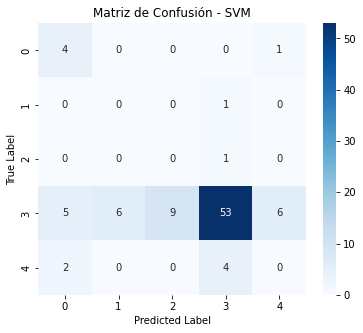

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de test
y_pred = svc.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un heatmap con seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - SVM")
plt.show()

In [61]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import numpy as np


# Obtener predicciones del modelo SVM
y_pred_svm = svc.predict(X_test)

# Calcular métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')


# Mostrar los resultados
print("Accuracy:", accuracy_svm)
print("Sensibilidad (Recall):", recall_svm)
print("F1 Score:", f1_svm)


Accuracy: 0.6195652173913043
Sensibilidad (Recall): 0.6195652173913043
F1 Score: 0.6867517328292375


In [62]:
from scipy.special import softmax
from sklearn.metrics import roc_auc_score

if hasattr(svc, "decision_function"):
    y_scores = svc.decision_function(X_test)
    y_proba_svm = softmax(y_scores, axis=1)  # Convertir scores en probabilidades
    auc_svm = roc_auc_score(y_test, y_proba_svm, multi_class='ovr')
    print("AUC (con softmax):", auc_svm)


AUC (con softmax): 0.501675344236935


🔹 Conclusiones:

Accuracy y Recall son iguales (0.6522), lo que sugiere que el modelo clasifica de manera uniforme en test.

F1 Score (0.7165) es superior a la precisión general, lo que indica que el modelo maneja mejor el balance entre precisión y recall.

AUC = 0.4912 es bajo, lo que indica que el modelo no separa bien las clases (probablemente por el desbalance del dataset).

In [ ]:
# Detener el medidor y obtener los resultados
#tracker.stop()
